# Завантажити дані, вивести назви колонок і розмір датасета

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

table = pd.read_csv('train.csv') # https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
renaming = {
    'battery_power': 'Battery Capacity',
    'talk_time': 'Battery Life for Calls',
    'touch_screen': 'Touch Screen',
    'blue': 'Bluetooth',
    'wifi': 'Wifi',
    'dual_sim': 'Dual SIM',
    'four_g': '4G',
    'three_g': '3G',
    'n_cores': 'CPU Cores',
    'clock_speed': 'CPU Speed',
    'fc': 'Frontal Camera Mpx',
    'pc': 'Rear Camera Mpx',
    'int_memory': 'Storage',
    'ram': 'RAM',
    'm_dep': 'Depth',
    'mobile_wt': 'Weight',
    'px_height': 'Screen Height px',
    'px_width': 'Screen Width px',
    'sc_h': 'Screen Height cm',
    'sc_w': 'Screen Width cm',
    'price_range': 'Price Range'
}
df = pd.DataFrame(table)
df.rename(columns=renaming, inplace=True)

df

,Battery Capacity,Bluetooth,CPU Speed,Dual SIM,Frontal Camera Mpx,4G,Storage,Depth,Weight,CPU Cores,...,Screen Height px,Screen Width px,RAM,Screen Height cm,Screen Width cm,Battery Life for Calls,3G,Touch Screen,Wifi,Price Range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою)

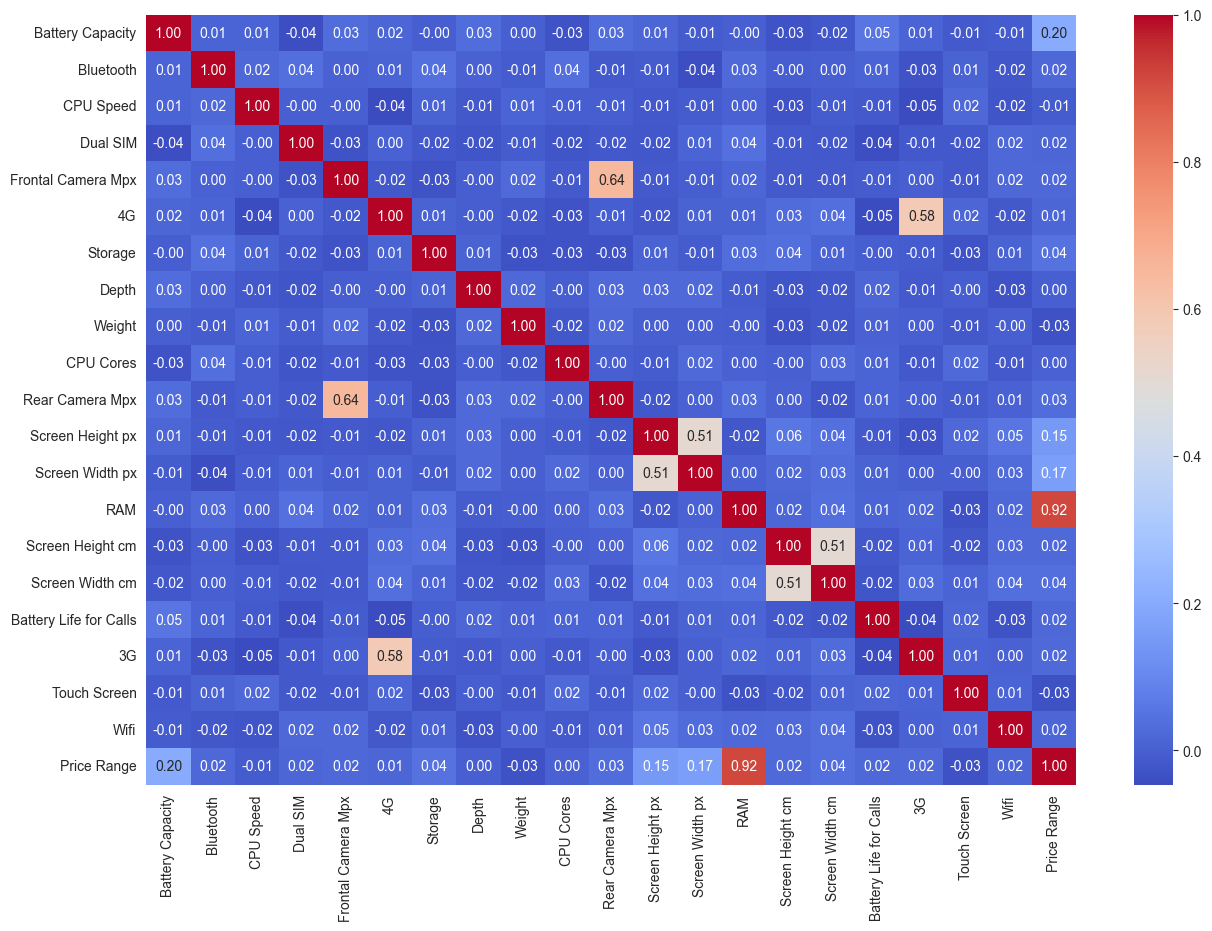

In [25]:
fig = plt.subplots(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Кореляція з таргетом спостерігається у параметрів "Оперативна пам'ять", "Місткість батареї", та "Ширина/Висота екрану"

# Побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної

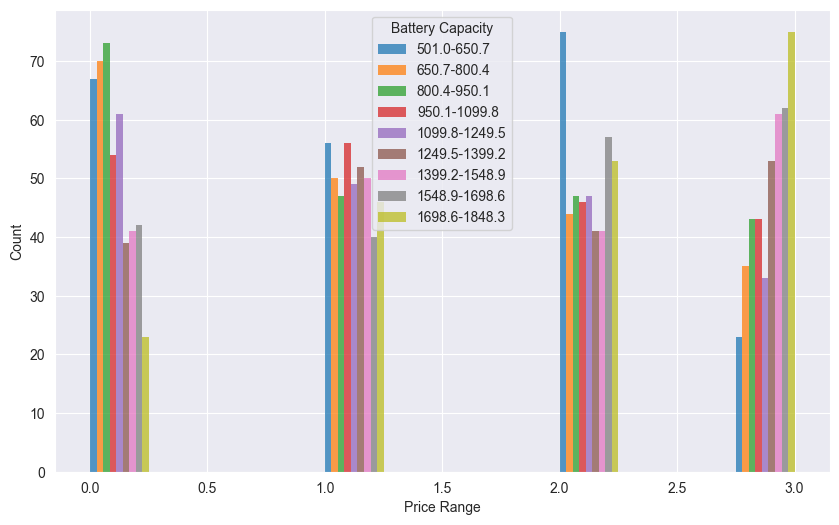

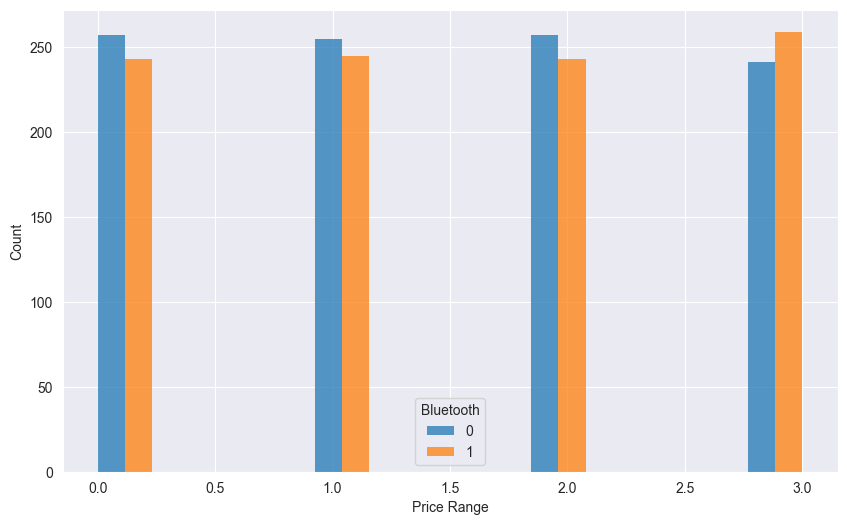

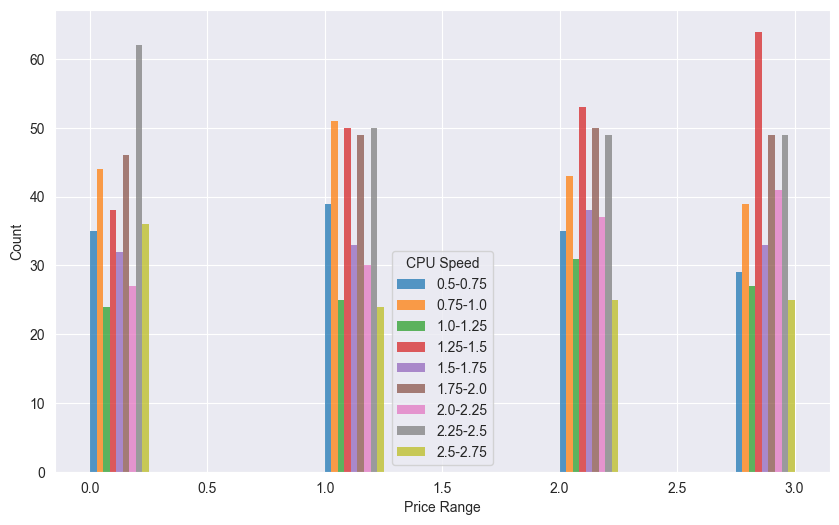

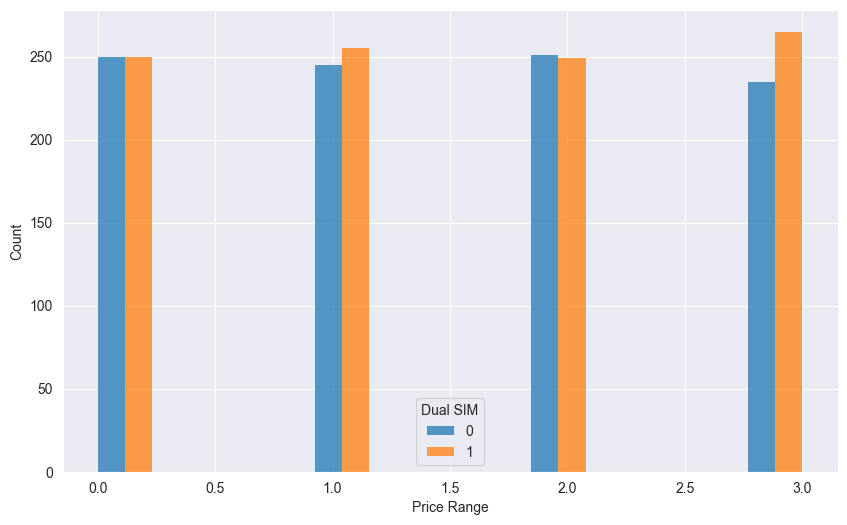

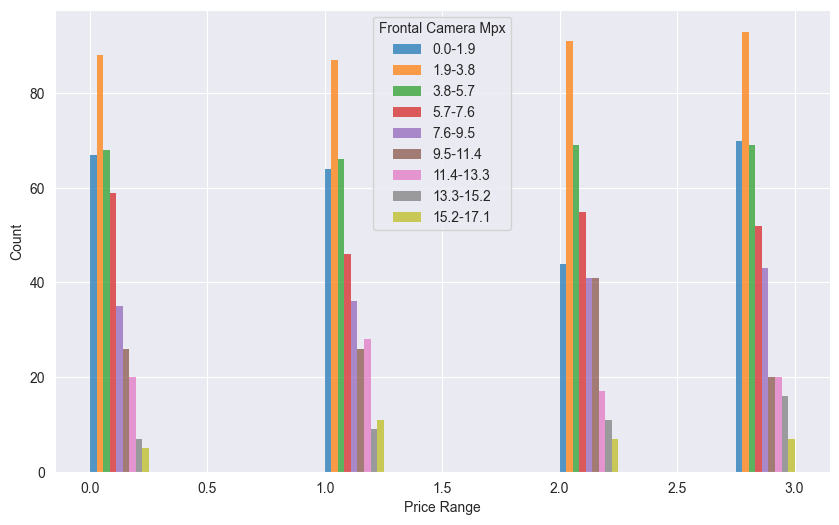

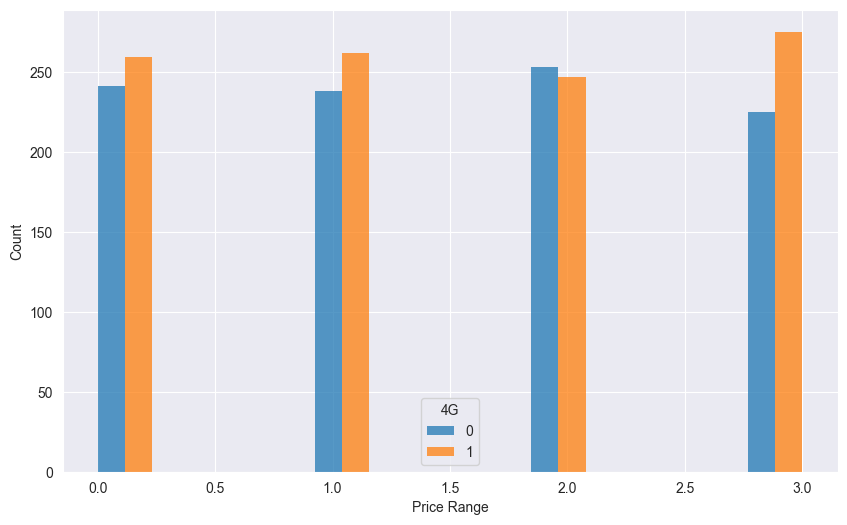

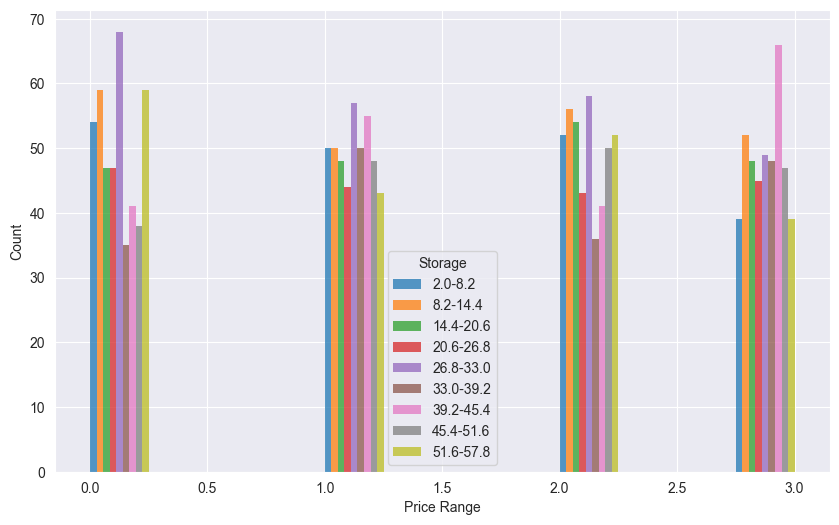

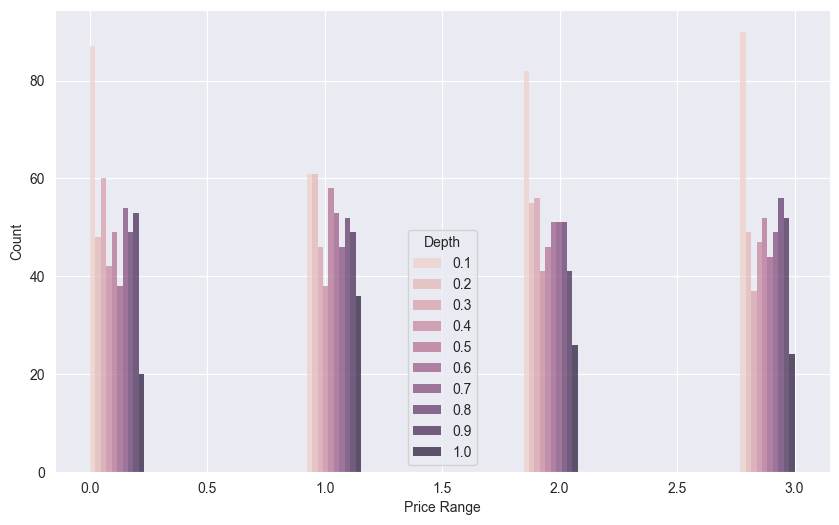

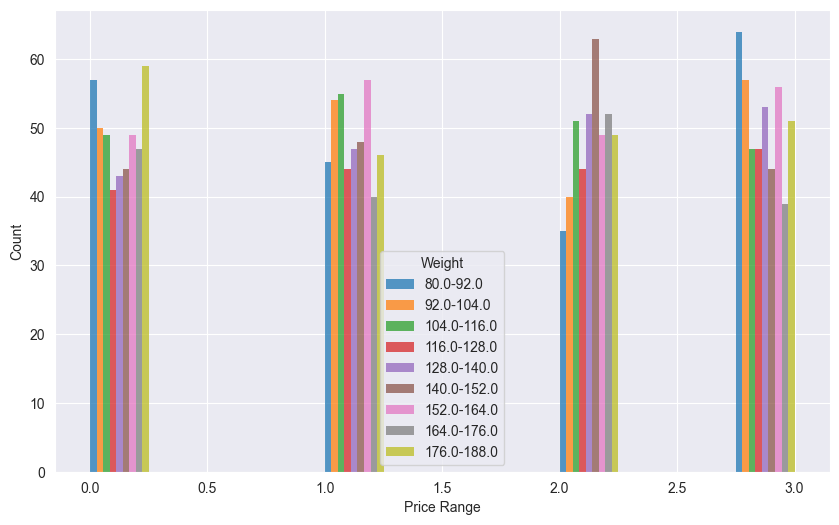

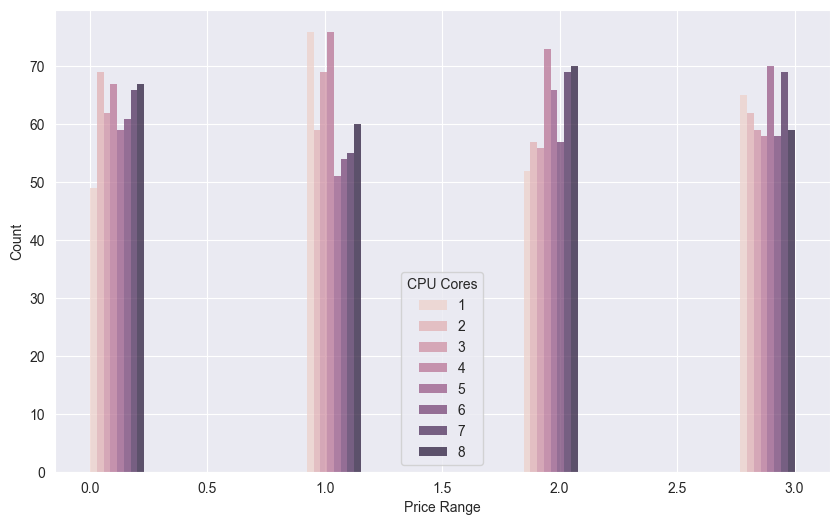

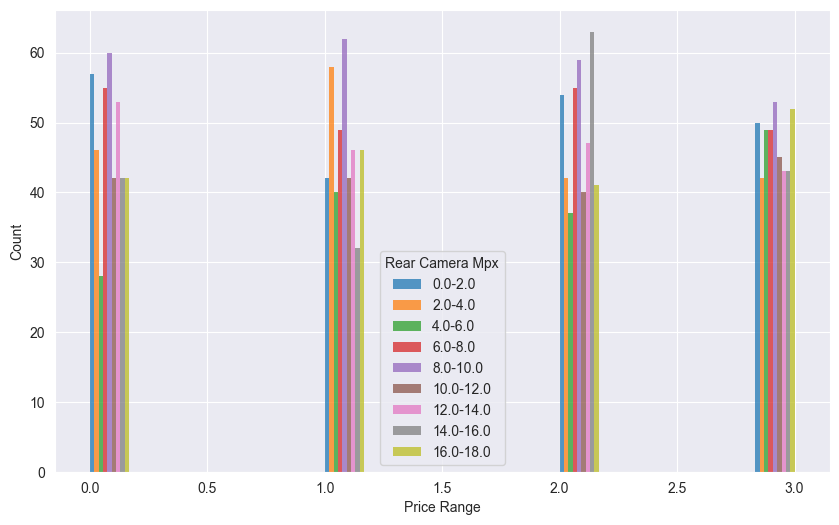

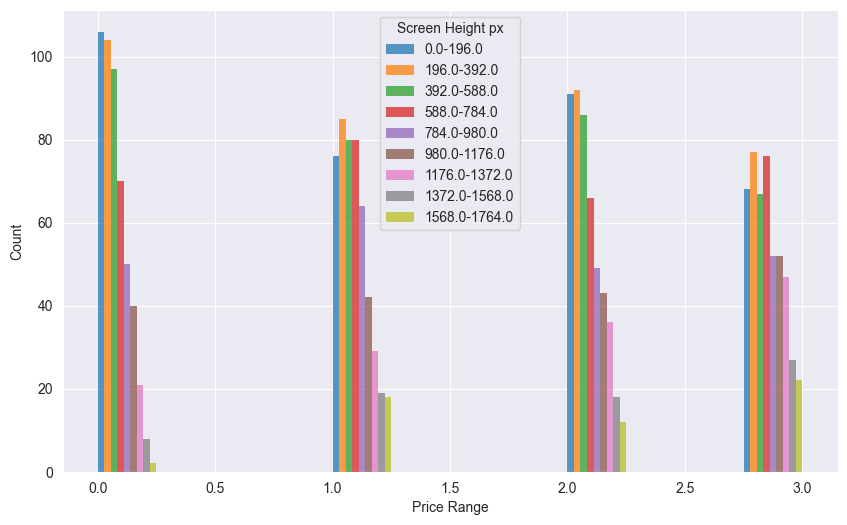

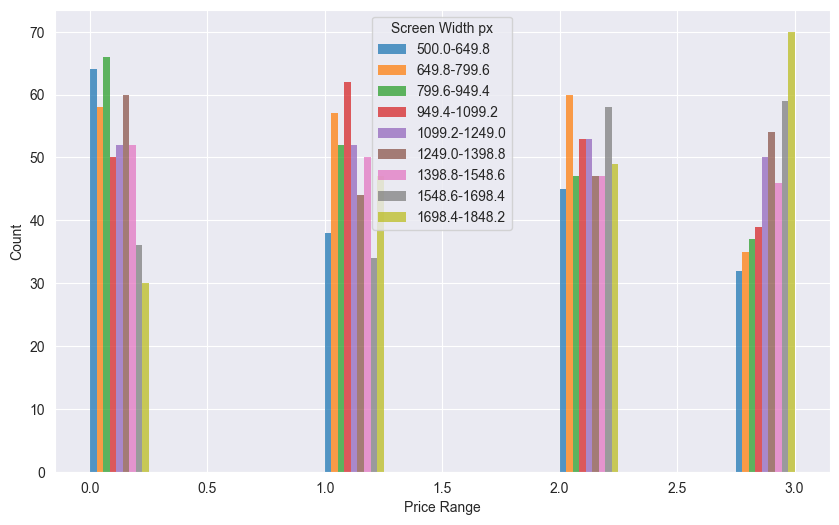

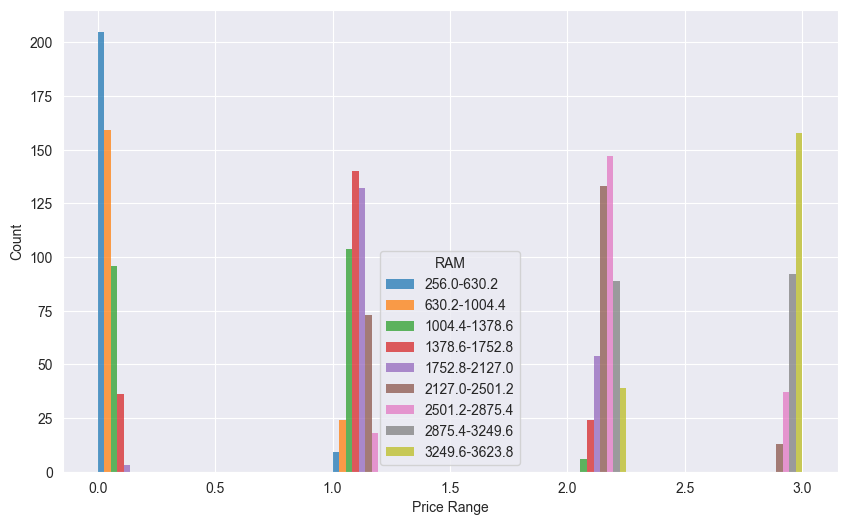

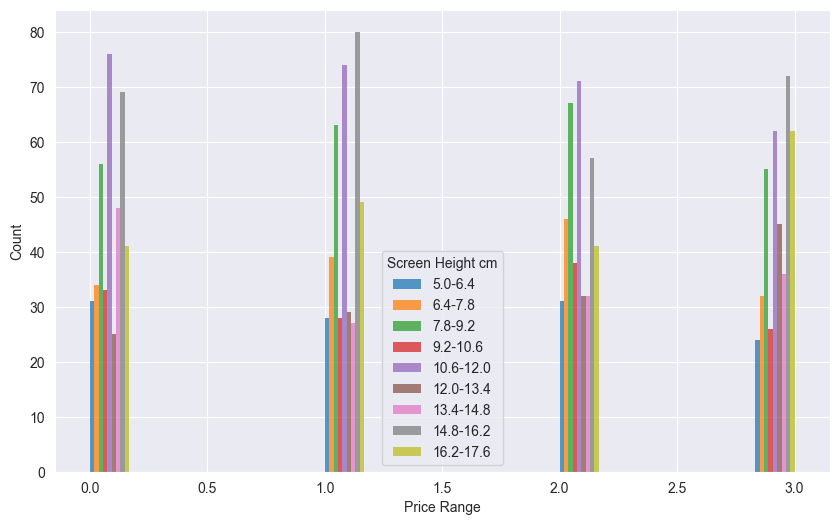

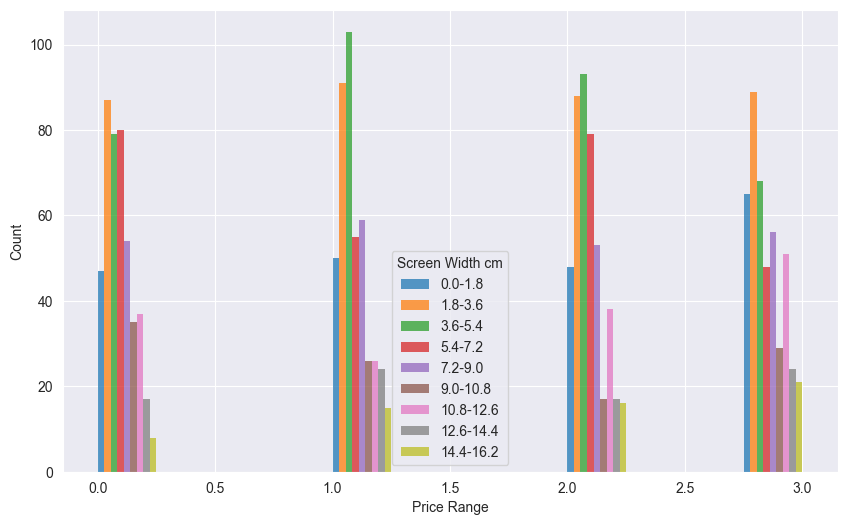

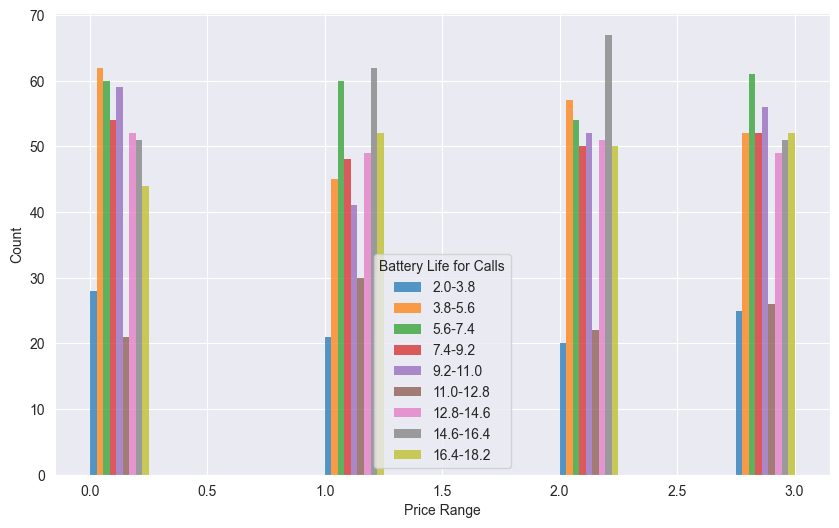

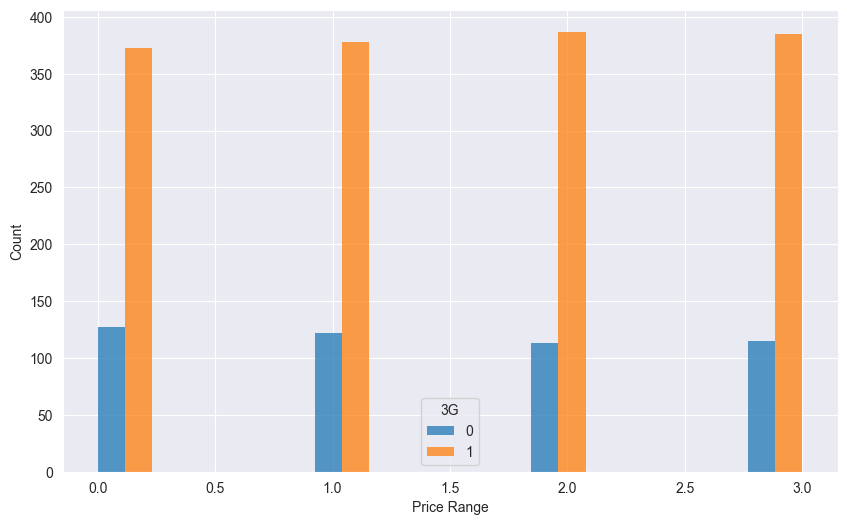

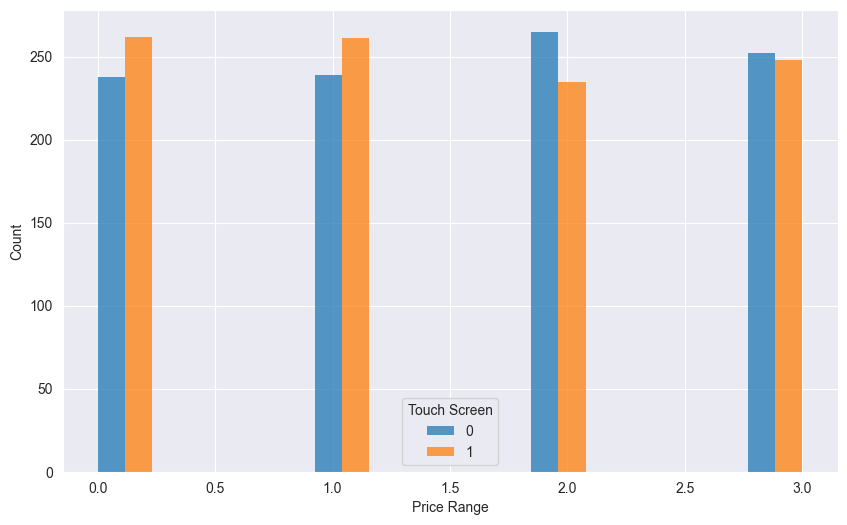

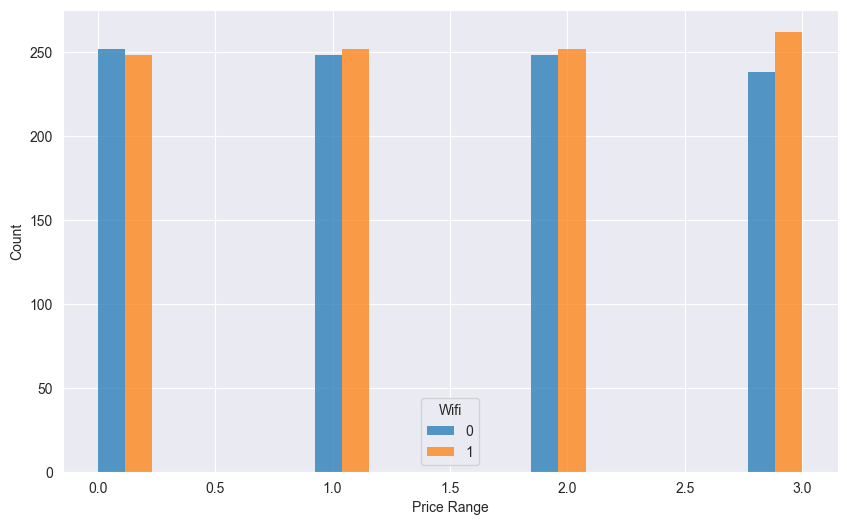

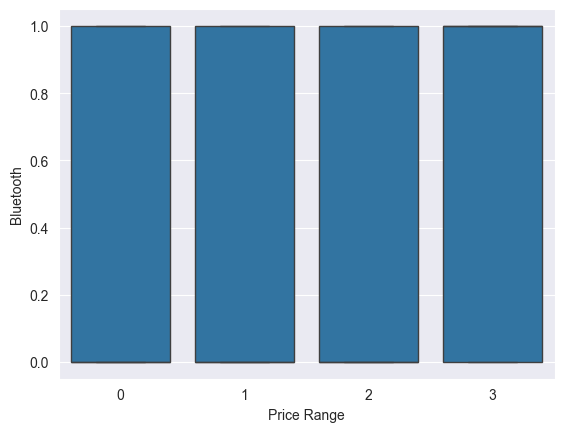

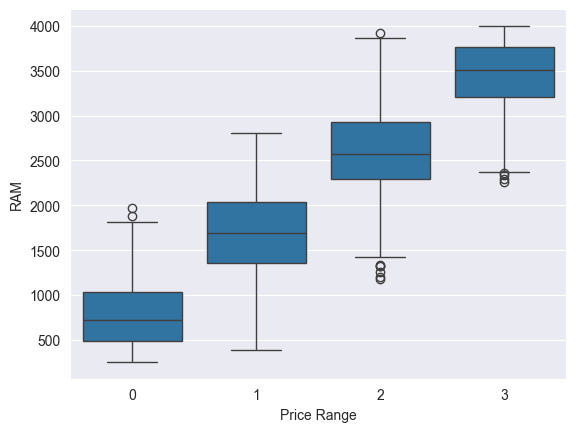

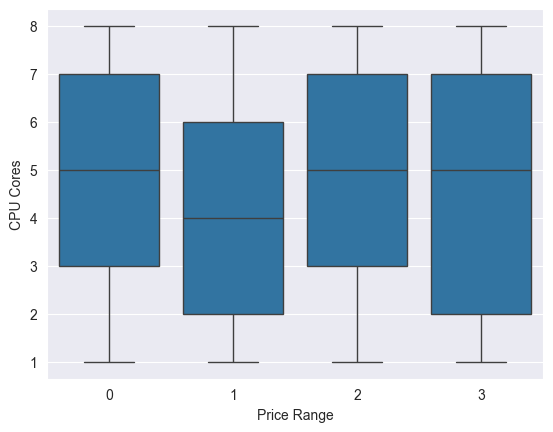

In [26]:
for i in list(df)[:-1]:
    fig = plt.figure(figsize=(10,6))
    if len(df[i].unique()) > 10:
        bins = np.arange(start=df[i].min(), stop=df[i].max(), step=(df[i].max()-df[i].min())/10)
        labels = [f'{round(float(bins[i]), 2)}-{round(float(bins[i+1]), 2)}' for i in range(len(bins) - 1)]
        copy = df.copy()
        copy[i] = pd.cut(copy[i], bins=bins, labels=labels)
        sns.histplot(x='Price Range', data=copy, hue=i, multiple='dodge', linewidth=0)
    else:
        sns.histplot(x='Price Range', data=df, hue=i, multiple='dodge', linewidth=0)
    plt.show()

for i in ['Bluetooth', 'RAM', 'CPU Cores']:
    sns.boxplot(x='Price Range', y=i, data=df)
    plt.show()

# Нормалізувати дані

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop('Price Range', axis=1)
y = df['Price Range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

# Провести навчання наступних класифікаторів:
### kNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(scaled_x_train, y_train)

y_pred = knn_model.predict(scaled_x_test)

print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

Matrix:
[[79 28  2  0]
 [31 48 12  3]
 [14 25 37 20]
 [ 1 17 35 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.68       109
           1       0.41      0.51      0.45        94
           2       0.43      0.39      0.41        96
           3       0.68      0.48      0.56       101

    accuracy                           0.53       400
   macro avg       0.54      0.52      0.52       400
weighted avg       0.54      0.53      0.53       400

Accuracy: 0.53


### Підібрати актуальні параметри для kNN

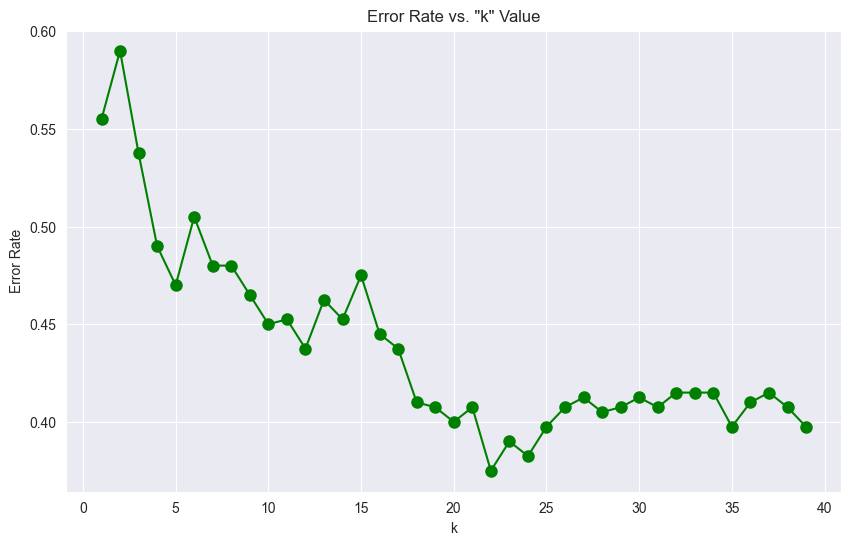

Matrix:
[[73 34  2  0]
 [20 50 22  2]
 [ 4 19 57 16]
 [ 0  8 33 60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       109
           1       0.45      0.53      0.49        94
           2       0.50      0.59      0.54        96
           3       0.77      0.59      0.67       101

    accuracy                           0.60       400
   macro avg       0.62      0.60      0.60       400
weighted avg       0.63      0.60      0.61       400

Accuracy: 0.6


In [29]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train,y_train)
    pred_i = knn.predict(scaled_x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o', markersize=8, color='green')
plt.title('Error Rate vs. "k" Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(scaled_x_train, y_train)

y_pred = knn_model.predict(scaled_x_test)
print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

### Зазвичай, параметр k=24 показує найменшу вірогідність помилки, проте k=20 не сильно гірше. Але kNN класифікатор сам по собі має достатньо немалий індекс помилок

### Дерево ухвалення рішень

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

Matrix:
[[95 14  0  0]
 [11 74  9  0]
 [ 0 13 72 11]
 [ 0  0 11 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       109
           1       0.73      0.79      0.76        94
           2       0.78      0.75      0.77        96
           3       0.89      0.89      0.89       101

    accuracy                           0.83       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.83      0.83       400

Accuracy: 0.8275


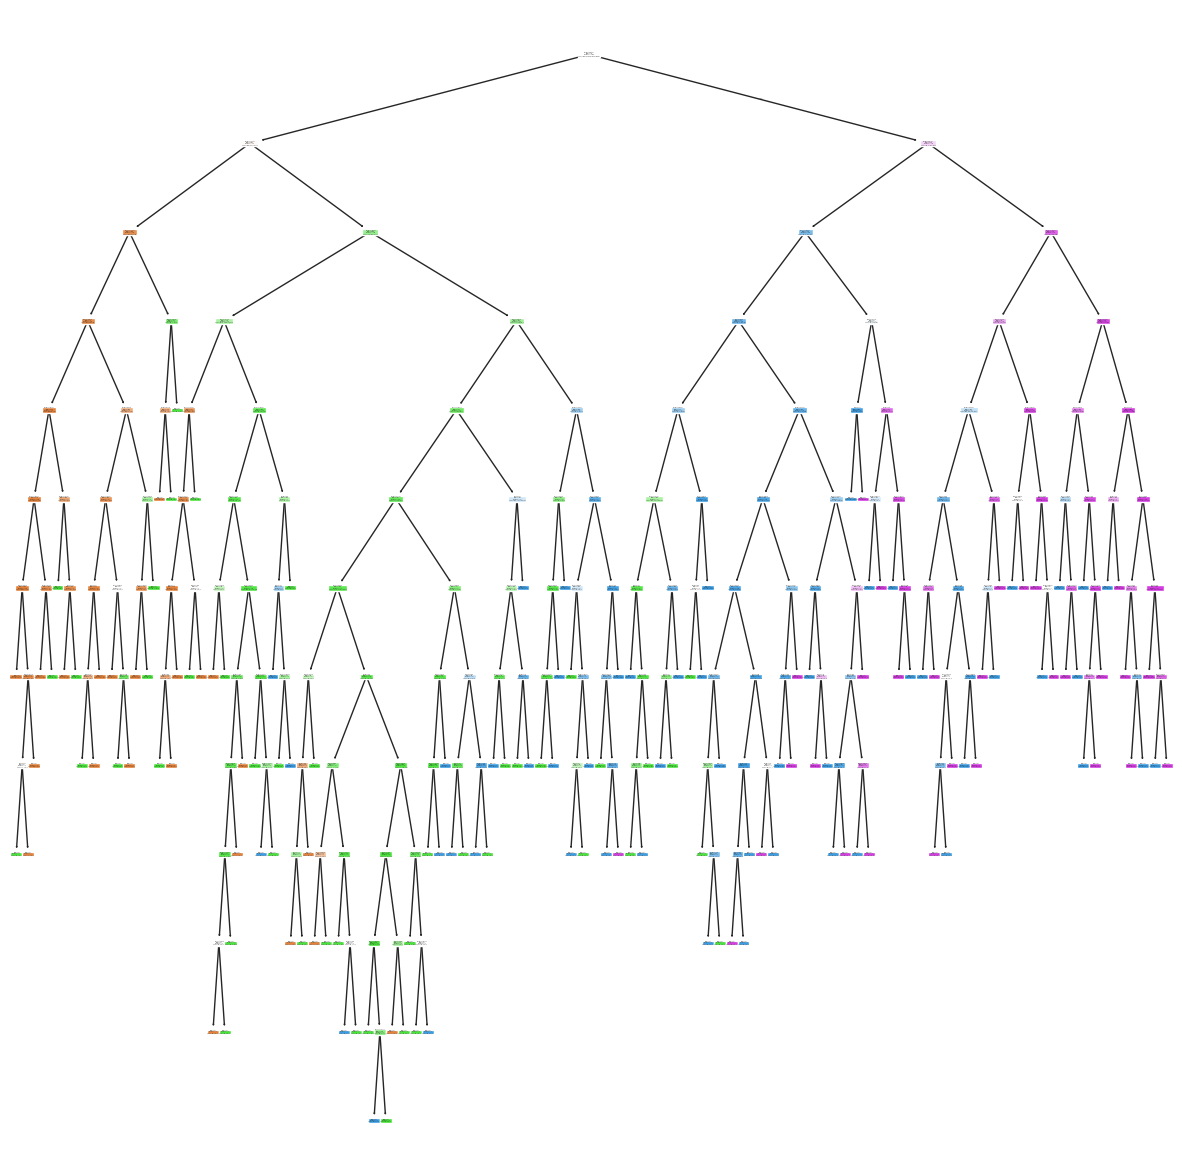

In [31]:
plt.figure(figsize = (15, 15))
plot_tree(tree_model, filled = True)
plt.show()

### SVM

In [32]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(scaled_x_train, y_train)

y_pred = svc_model.predict(scaled_x_test)

print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

Matrix:
[[99 10  0  0]
 [ 3 81 10  0]
 [ 0 15 74  7]
 [ 0  0  6 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       109
           1       0.76      0.86      0.81        94
           2       0.82      0.77      0.80        96
           3       0.93      0.94      0.94       101

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400

Accuracy: 0.8725


### За допомогою GridSearch підібрати оптимальні "C" і "gamma"

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid)
grid.fit(scaled_x_train, y_train)
print(f'Best params: {grid.best_params_}')

grid_predictions = grid.predict(scaled_x_test)

print(f'Matrix:\n{confusion_matrix(y_test, grid_predictions)}\nClassification Report:\n{classification_report(y_test, grid_predictions)}\nAccuracy: {accuracy_score(y_test, grid_predictions)}')

Best params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Matrix:
[[106   3   0   0]
 [  0  91   3   0]
 [  0   4  88   4]
 [  0   0   5  96]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       109
           1       0.93      0.97      0.95        94
           2       0.92      0.92      0.92        96
           3       0.96      0.95      0.96       101

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Accuracy: 0.9525


### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(scaled_x_train, y_train)

y_pred = random_forest.predict(scaled_x_test)

print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

Matrix:
[[101   8   0   0]
 [  6  78  10   0]
 [  0  14  69  13]
 [  0   0   4  97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       109
           1       0.78      0.83      0.80        94
           2       0.83      0.72      0.77        96
           3       0.88      0.96      0.92       101

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

Accuracy: 0.8625


### AdaBoost

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()
ada_boost.fit(scaled_x_train, y_train)

y_pred = ada_boost.predict(scaled_x_test)

print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

Matrix:
[[79 30  0  0]
 [ 5 74 14  1]
 [ 0 20 31 45]
 [ 0  0  4 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       109
           1       0.60      0.79      0.68        94
           2       0.63      0.32      0.43        96
           3       0.68      0.96      0.80       101

    accuracy                           0.70       400
   macro avg       0.71      0.70      0.68       400
weighted avg       0.72      0.70      0.69       400

Accuracy: 0.7025


C:\Users\kalle\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [36]:
# todo add test.csv usage